## Demo Week 4: Lecture 2

In this demonstration we want to understand components of the `pandas` package. We will look at useful tools for

- Inpecting a Table 
- Sorting the Numbers in a Table 
- Summarizing through Statistics like Average and Standard Deviation

We will focus on two operations: grouping and pivoting

- groupby function for pulling together rows according to some pattern
- operation 
 * agg
 * size 
 * filter
- pivot tables for grouping with two patterns

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from IPython.display import Image

#### Useful Tools

In [2]:
elections = pd.read_csv(os.environ["HOME"] + "/shared/election_data.csv")

##### Look at the data

In [3]:
elections.head(3)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927


In [4]:
elections.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
173,2016,Donald Trump,Republican,62984828,win,46.407862
174,2016,Evan McMullin,Independent,732273,loss,0.539546
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
177,2016,Jill Stein,Green,1457226,loss,1.073699


In [5]:
elections.sample(10)

,Year,Candidate,Party,Popular vote,Result,%
22,1856,Millard Fillmore,American,873053,loss,21.554001
97,1944,Franklin Roosevelt,Democratic,25612916,win,53.773801
52,1896,William Jennings Bryan,Democratic,6509052,loss,46.871053
65,1908,William Taft,Republican,7678335,win,52.013300
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
16,1848,Zachary Taylor,Whig,1360235,win,47.309296
158,2004,John Kerry,Democratic,59028444,loss,48.306775
72,1916,Charles Evans Hughes,Republican,8548728,loss,46.240779


In [6]:
elections.shape

(178, 6)

In [7]:
elections.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177])

In [8]:
elections.columns

Index(['Year', 'Candidate', 'Party', 'Popular vote', 'Result', '%'], dtype='object')

In [9]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          178 non-null    int64  
 1   Candidate     178 non-null    object 
 2   Party         178 non-null    object 
 3   Popular vote  178 non-null    int64  
 4   Result        178 non-null    object 
 5   %             178 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ KB


You should only read a file from storage with a least twice the available memory. 

##### Sort

In [10]:
elections["Year"].unique()

array([1824, 1828, 1832, 1836, 1840, 1844, 1848, 1852, 1856, 1860, 1864,
       1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908,
       1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952,
       1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016])

In [11]:
elections["Party"].isin(["Democratic", "Republican"])

0      False
1      False
2       True
3      False
4       True
       ...  
173     True
174    False
175    False
176     True
177    False
Name: Party, Length: 178, dtype: bool

In [12]:
elections[elections["Party"].isin(["Democratic", "Republican"])]

,Year,Candidate,Party,Popular vote,Result,%
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
10,1840,Martin Van Buren,Democratic,1128854,loss,46.948787
13,1844,James Polk,Democratic,1339570,win,50.749477
...,...,...,...,...,...,...
166,2008,John McCain,Republican,59948323,loss,45.737243
168,2012,Barack Obama,Democratic,65915795,win,51.258484
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862


In [13]:
elections.sort_values("%")

,Year,Candidate,Party,Popular vote,Result,%
156,2004,David Cobb,Green,119859,loss,0.098088
141,1992,Bo Gritz,Populist,106152,loss,0.101918
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
...,...,...,...,...,...,...
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
79,1920,Warren Harding,Republican,16144093,win,60.574501
120,1972,Richard Nixon,Republican,47168710,win,60.907806
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107


In [14]:
elections.sort_values("%", ascending=False)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
...,...,...,...,...,...,...
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Note that tools like `sort_values` do not change the table. We can check that `elections` has not been sorted by the percent vote.

In [15]:
elections

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
173,2016,Donald Trump,Republican,62984828,win,46.407862
174,2016,Evan McMullin,Independent,732273,loss,0.539546
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


##### Summarize 

In [16]:
average = sum(elections["%"]) / len(elections["%"])
average

27.528089887651696

In [17]:
elections["%"].mean()

27.52808988765169

In [67]:
variance = sum((elections["%"] - average)**2) / len(elections["%"]) 
variance**(1/2)

22.870693567941952

In [68]:
elections["%"].std()

22.935209051726066

In [69]:
dem_rep = elections[elections["Party"].isin(["Democratic", "Republican"])][["Party","%"]]

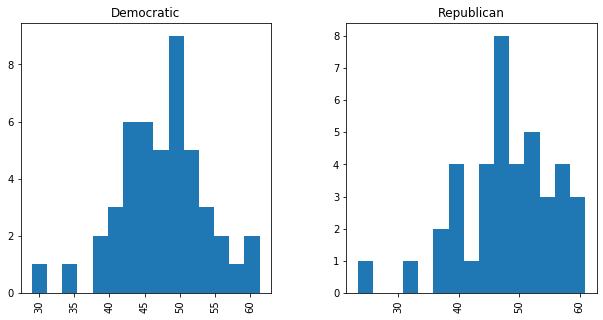

In [70]:
dem_rep.hist(bins=15, by="Party", figsize = (10,5));

#### Apply

Let's start by loading the New York baby names.

In [21]:
babynames = pd.read_csv(os.environ["HOME"] + "/shared/NY_babynames.csv")

In [22]:
babynames.head(3)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990


We want to answer several questions about the dataset. 

**Question** what was the most popular name last year? 

In [23]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
294173,NY,M,2018,Liam,1509
294174,NY,M,2018,Noah,1268
166664,NY,F,2018,Emma,1095
166665,NY,F,2018,Olivia,1083
294175,NY,M,2018,Jacob,1010


**Question** Which names start with the letter e? 

In [24]:
babynames["Name"].head(10)

0        Mary
1       Helen
2        Rose
3        Anna
4    Margaret
5     Dorothy
6        Ruth
7     Lillian
8    Florence
9     Frances
Name: Name, dtype: object

In [25]:
# loop 

start_with_e = []

for name in babynames["Name"]:
    if name[0] == "E":
        start_with_e.append(name)

start_with_e[:5]

['Elizabeth', 'Evelyn', 'Ethel', 'Edna', 'Eleanor']

In [26]:
# list comprehension 

start_with_e = [name for name in babynames["Name"] if name[0] == 'E']

start_with_e[:5]

['Elizabeth', 'Evelyn', 'Ethel', 'Edna', 'Eleanor']

In [27]:
# apply 

def get_first_letter(some_string):
    return some_string[0]

new_column_letter = babynames["Name"].apply(get_first_letter)

In [28]:
babynames["Letter"] = new_column_letter
babynames.head(3)

,State,Sex,Year,Name,Count,Letter
0,NY,F,1910,Mary,1923,M
1,NY,F,1910,Helen,1290,H
2,NY,F,1910,Rose,990,R


In [29]:
babynames[babynames["Letter"].isin(["E"])]["Name"]

10        Elizabeth
18           Evelyn
22            Ethel
25             Edna
28          Eleanor
            ...    
296016        Ervin
296017        Erwin
296018          Esa
296019         Essa
296020        Eyden
Name: Name, Length: 15214, dtype: object

In [30]:
babynames.drop(columns=["Letter"])

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
296194,NY,M,2018,Zaidyn,5
296195,NY,M,2018,Zidan,5
296196,NY,M,2018,Zuhair,5
296197,NY,M,2018,Zvi,5


In [31]:
babynames.drop(columns=["Letter"], inplace = True)

**Exercise** Return all names ending with y

**Question** Sort the data by the number of occurrences of "dr" plus the number of occurences of "ea" in the name. 

In [32]:
def dr_ea_count(some_string):
    return some_string.count('dr') + some_string.count('ea')

In [33]:
babynames["dr_ea_count"] = babynames["Name"].apply(dr_ea_count)

In [34]:
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)

In [35]:
babynames = babynames.drop("dr_ea_count", 1)
babynames.head(5)

,State,Sex,Year,Name,Count
76141,NY,F,1978,Deandrea,5
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
149033,NY,F,2011,Andrea,137
235701,NY,M,1986,Leandro,5


In [36]:
babynames = pd.read_csv(os.environ["HOME"] + "/shared/NY_babynames.csv")

In [37]:
babynames.head(3)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990


Another approach is to take advantage of the fact that .loc can accept an index. That is:
 + df.loc[idx] returns df with its rows in the same order as the given index.
 + Only works if the index exactly matches the DataFrame.

The first step was to create a sequence of the lengths of the names.

In [38]:
dr_ea_counts_series = babynames["Name"].apply(dr_ea_count)
dr_ea_counts_series.head(3)

0    0
1    0
2    0
Name: Name, dtype: int64

The next step is to sort the new series we just created.

In [39]:
dr_ea_counts_series_sorted = dr_ea_counts_series.sort_values(ascending = False)
dr_ea_counts_series_sorted.head(5)

120958    3
95292     3
76141     3
155515    2
85330     2
Name: Name, dtype: int64

Next, we pass the index of the sorted series to the loc method of the original dataframe.

In [40]:
dr_ea_counts_series_sorted_index = dr_ea_counts_series_sorted.index
dr_ea_counts_series_sorted_index

Int64Index([120958,  95292,  76141, 155515,  85330, 105708,  28063, 224812,
            124584, 193786,
            ...
            196232, 196231, 196230, 196229, 196228, 196227, 196226, 196225,
            196223,      0],
           dtype='int64', length=296199)

In [41]:
babynames.loc[dr_ea_counts_series_sorted_index].head(5)

,State,Sex,Year,Name,Count
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
76141,NY,F,1978,Deandrea,5
155515,NY,F,2013,Alexandrea,9
85330,NY,F,1983,Leandra,6


Note we can also do this all in one line:

In [42]:
babynames.loc[babynames["Name"].apply(dr_ea_count).sort_values(ascending=False).index].head(5)

,State,Sex,Year,Name,Count
120958,NY,F,1999,Deandrea,5
95292,NY,F,1988,Deandrea,6
76141,NY,F,1978,Deandrea,5
155515,NY,F,2013,Alexandrea,9
85330,NY,F,1983,Leandra,6


#### Grouping

Suppose we want to understand trends in names. 

**Question** What name has changed most in popularity? Here we can measure the change as the difference between maximum count and minimum count

In [43]:
jennifer_counts = babynames[babynames["Name"] == "Jennifer"]["Count"]
jennifer_counts.head(5)

16256    6
17091    5
17813    5
19291    5
19873    9
Name: Count, dtype: int64

In [44]:
def max_minus_min(series):
    return max(series) - min(series)

In [45]:
max_minus_min(jennifer_counts)

5519

As a first approach, we can try to use a for loop.

In [46]:
#build dictionary where entry i is the max_minus_min for the given name
#e.g. max_minus_min["jennifer"] should be 5519

max_minus_min_of_babyname_counts = {}

for name in babynames["Name"].unique()[0:10]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    max_minus_min_of_babyname_counts[name] = max_minus_min(counts_of_current_name)
    

In [47]:
#convert to series
max_minus_min_of_babyname_counts = pd.Series(max_minus_min_of_babyname_counts) 
max_minus_min_of_babyname_counts

Mary        5518
Helen       4086
Rose        2350
Anna        2315
Margaret    2759
Dorothy     3417
Ruth        2715
Lillian     1541
Florence    1888
Frances     1889
dtype: int64

Answer below. Note that we only used the first 10 names because otherwise the code takes ages to complete running.

As a second approach, we could instead use groupby.agg operation. The groupby.agg operation is both simple and efficien -- in particular we can use it on the dataset without a long wait. 

In [48]:
babynames.groupby("Name").agg({"Count":max}).head(5)

,Count
Name,
Aaban,6
Aaden,63
Aadhya,8
Aadi,7
Aadil,5


In [49]:
babynames.groupby("Name").agg({"Count":min}).tail(5)

,Count
Name,
Zyire,5
Zyla,6
Zylah,6
Zymir,5
Zyon,5


In [50]:
babynames.groupby("Name").agg({"Count":max_minus_min}).sort_values(by = "Count", ascending = False)

,Count
Name,
Robert,10016
John,9631
Michael,9239
Linda,7537
James,7167
...,...
Railynn,0
Hanoch,0
Raifa,0


**Exercise** How can we understand the following code? Did Woodrow Wilson campaign in 2016?

In [51]:
elections = pd.read_csv(os.environ["HOME"] + "/shared/election_data.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
21,1856,John C. Frémont,Republican,1342345,loss,33.139919
63,1908,Eugene W. Chafin,Prohibition,254087,loss,1.721194
83,1928,Al Smith,Democratic,15015464,loss,40.902853
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
42,1888,Alson Streeter,Union Labor,146602,loss,1.288861


In [52]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2016,Woodrow Wilson,69498516,win,61.344703


We can correct the problem. Each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its highest percentage.

In [53]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(5)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326


In [54]:
def select_first(some_series):
    return some_series.values[0]

elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").agg(select_first)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


#### Groups

Applying a groupby operation to a Data Frame produces
a DataFrameGroupBy object. 

In [55]:
elections.groupby("Party")

In [56]:
for n, g in elections.groupby("Party"):
    print(n)
    display(g)

American


,Year,Candidate,Party,Popular vote,Result,%
22,1856,Millard Fillmore,American,873053,loss,21.554001
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


American Independent


,Year,Candidate,Party,Popular vote,Result,%
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640


Anti-Masonic


,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583


Anti-Monopoly


,Year,Candidate,Party,Popular vote,Result,%
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838


Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


Communist


,Year,Candidate,Party,Popular vote,Result,%
89,1932,William Z. Foster,Communist,103307,loss,0.261069


Constitution


,Year,Candidate,Party,Popular vote,Result,%
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
164,2008,Chuck Baldwin,Constitution,199750,loss,0.152398
172,2016,Darrell Castle,Constitution,203091,loss,0.149640


Constitutional Union


,Year,Candidate,Party,Popular vote,Result,%
24,1860,John Bell,Constitutional Union,590901,loss,12.639283


Democratic


,Year,Candidate,Party,Popular vote,Result,%
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
10,1840,Martin Van Buren,Democratic,1128854,loss,46.948787
13,1844,James Polk,Democratic,1339570,win,50.749477
14,1848,Lewis Cass,Democratic,1223460,loss,42.552229
17,1852,Franklin Pierce,Democratic,1605943,win,51.013168
20,1856,James Buchanan,Democratic,1835140,win,45.306080
28,1864,George B. McClellan,Democratic,1812807,loss,45.048488
29,1868,Horatio Seymour,Democratic,2708744,loss,47.334695


Democratic-Republican


,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878


Dixiecrat


,Year,Candidate,Party,Popular vote,Result,%
103,1948,Strom Thurmond,Dixiecrat,1175930,loss,2.412304


Farmer–Labor


,Year,Candidate,Party,Popular vote,Result,%
78,1920,Parley P. Christensen,Farmer–Labor,265398,loss,0.995804


Free Soil


,Year,Candidate,Party,Popular vote,Result,%
15,1848,Martin Van Buren,Free Soil,291501,loss,10.138474
18,1852,John P. Hale,Free Soil,155210,loss,4.930283


Green


,Year,Candidate,Party,Popular vote,Result,%
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699


Greenback


,Year,Candidate,Party,Popular vote,Result,%
35,1880,James B. Weaver,Greenback,308649,loss,3.352344


Independent


,Year,Candidate,Party,Popular vote,Result,%
121,1976,Eugene McCarthy,Independent,740460,loss,0.911649
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


Liberal Republican


,Year,Candidate,Party,Popular vote,Result,%
31,1872,Horace Greeley,Liberal Republican,2834761,loss,44.071406


Libertarian


,Year,Candidate,Party,Popular vote,Result,%
125,1976,Roger MacBride,Libertarian,172557,loss,0.212451
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
132,1984,David Bergland,Libertarian,228111,loss,0.247245
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
146,1996,Harry Browne,Libertarian,485759,loss,0.505198
153,2000,Harry Browne,Libertarian,384431,loss,0.365525
159,2004,Michael Badnarik,Libertarian,397265,loss,0.325108
163,2008,Bob Barr,Libertarian,523715,loss,0.399565
169,2012,Gary Johnson,Libertarian,1275971,loss,0.992241


National Democratic


,Year,Candidate,Party,Popular vote,Result,%
50,1896,John M. Palmer,National Democratic,134645,loss,0.969566


National Republican


,Year,Candidate,Party,Popular vote,Result,%
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
5,1832,Henry Clay,National Republican,484205,loss,37.603628


National Union


,Year,Candidate,Party,Popular vote,Result,%
27,1864,Abraham Lincoln,National Union,2211317,win,54.951512


Natural Law


,Year,Candidate,Party,Popular vote,Result,%
148,1996,John Hagelin,Natural Law,113670,loss,0.118219


New Alliance


,Year,Candidate,Party,Popular vote,Result,%
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


Northern Democratic


,Year,Candidate,Party,Popular vote,Result,%
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311


Populist


,Year,Candidate,Party,Popular vote,Result,%
48,1892,James B. Weaver,Populist,1041028,loss,8.645038
61,1904,Thomas E. Watson,Populist,114070,loss,0.845563
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Progressive


,Year,Candidate,Party,Popular vote,Result,%
68,1912,Theodore Roosevelt,Progressive,4122721,loss,27.457433
82,1924,Robert La Follette,Progressive,4831706,loss,16.694596
101,1948,Henry A. Wallace,Progressive,1157328,loss,2.374144
107,1952,Vincent Hallinan,Progressive,140746,loss,0.228516


Prohibition


,Year,Candidate,Party,Popular vote,Result,%
41,1884,John St. John,Prohibition,147482,loss,1.467021
44,1888,Clinton B. Fisk,Prohibition,249819,loss,2.196299
49,1892,John Bidwell,Prohibition,270879,loss,2.249468
51,1896,Joshua Levering,Prohibition,131312,loss,0.945565
54,1900,John G. Woolley,Prohibition,210864,loss,1.526821
59,1904,Silas C. Swallow,Prohibition,259102,loss,1.920637
63,1908,Eugene W. Chafin,Prohibition,254087,loss,1.721194
67,1912,Eugene W. Chafin,Prohibition,208156,loss,1.386325
73,1916,Frank Hanly,Prohibition,221302,loss,1.197041
75,1920,Aaron S. Watkins,Prohibition,188787,loss,0.708351


Reform


,Year,Candidate,Party,Popular vote,Result,%
150,1996,Ross Perot,Reform,8085294,loss,8.408844
154,2000,Pat Buchanan,Reform,448895,loss,0.426819


Republican


,Year,Candidate,Party,Popular vote,Result,%
21,1856,John C. Frémont,Republican,1342345,loss,33.139919
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
30,1868,Ulysses Grant,Republican,3013790,win,52.665305
32,1872,Ulysses Grant,Republican,3597439,win,55.928594
33,1876,Rutherford Hayes,Republican,4034142,win,48.471624
36,1880,James Garfield,Republican,4453337,win,48.369234
40,1884,James G. Blaine,Republican,4856905,loss,48.312208
43,1888,Benjamin Harrison,Republican,5443633,win,47.858041
46,1892,Benjamin Harrison,Republican,5176108,loss,42.984101
53,1896,William McKinley,Republican,7112138,win,51.213817


Socialist


,Year,Candidate,Party,Popular vote,Result,%
58,1904,Eugene V. Debs,Socialist,402810,loss,2.985897
62,1908,Eugene V. Debs,Socialist,420852,loss,2.850866
66,1912,Eugene V. Debs,Socialist,901551,loss,6.004354
71,1916,Allan L. Benson,Socialist,590524,loss,3.194193
76,1920,Eugene V. Debs,Socialist,913693,loss,3.428282
85,1928,Norman Thomas,Socialist,267478,loss,0.728623
88,1932,Norman Thomas,Socialist,884885,loss,2.236211
92,1936,Norman Thomas,Socialist,187910,loss,0.412876
95,1940,Norman Thomas,Socialist,116599,loss,0.234237
102,1948,Norman Thomas,Socialist,139569,loss,0.286312


Southern Democratic


,Year,Candidate,Party,Popular vote,Result,%
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998


States' Rights


,Year,Candidate,Party,Popular vote,Result,%
110,1956,T. Coleman Andrews,States' Rights,107929,loss,0.174883


Taxpayers


,Year,Candidate,Party,Popular vote,Result,%
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


Union


,Year,Candidate,Party,Popular vote,Result,%
93,1936,William Lemke,Union,892378,loss,1.960733


Union Labor


,Year,Candidate,Party,Popular vote,Result,%
42,1888,Alson Streeter,Union Labor,146602,loss,1.288861


Whig


,Year,Candidate,Party,Popular vote,Result,%
7,1836,Hugh Lawson White,Whig,146109,loss,10.005985
9,1836,William Henry Harrison,Whig,550816,loss,37.721543
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
12,1844,Henry Clay,Whig,1300004,loss,49.250523
16,1848,Zachary Taylor,Whig,1360235,win,47.309296
19,1852,Winfield Scott,Whig,1386942,loss,44.056548


In [57]:
elections.groupby("Party").get_group("Democratic")

,Year,Candidate,Party,Popular vote,Result,%
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
10,1840,Martin Van Buren,Democratic,1128854,loss,46.948787
13,1844,James Polk,Democratic,1339570,win,50.749477
14,1848,Lewis Cass,Democratic,1223460,loss,42.552229
17,1852,Franklin Pierce,Democratic,1605943,win,51.013168
20,1856,James Buchanan,Democratic,1835140,win,45.306080
28,1864,George B. McClellan,Democratic,1812807,loss,45.048488
29,1868,Horatio Seymour,Democratic,2708744,loss,47.334695


Functions can then be applied to DataFrameGroupBy objects to create new Data Frames and Series. We should study a couple of these functions (sometimes called methods).

**groupby.size()**

In [58]:
#size returns a Series giving the size of each group

elections.groupby("Party").size().head(3)

Party
American                2
American Independent    3
Anti-Masonic            1
dtype: int64

**groupby.filter()**

Filter gives a copy of the original DataFrame where row r is included if its group obeys the given condition.

Note that filtering is done per GROUP, not per ROW.

In [59]:
def my_filter_function(df):
    return max(df["%"]) < 45

In [60]:
elections.groupby("Year").filter(my_filter_function).head(3)

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998


#### Pivot Tables

In the question about changing popularity, we didn't take into account the possibility that the most popular name was actually spread across both birth sexes. While that possibility is unlikely for popular names, it could affect the difference of the maximum and minimum. For example the name Leslie is sometimes male and sometimes female.

It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the babies of each sex born in each year. We can aggregate by taking a sum to calculate the total number of births.

In [61]:
babynames.groupby(["Year", "Sex"]).agg({"Count":sum}).head(6)

Count
Year Sex       
1910 F    32428
     M    15720
1911 F    37180
     M    23621
1912 F    49386
     M    42658

In [62]:
babynames.groupby(["Sex", "Year"]).agg({"Count":sum}).head(6)

Count
Sex Year       
F   1910  32428
    1911  37180
    1912  49386
    1913  55056
    1914  73320
    1915  91549

In [63]:
babynames.head(5)

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926


In [64]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=sum, # group operation
)
babynames_pivot.head(6)

Count       
Sex       F      M
Year              
1910  32428  15720
1911  37180  23621
1912  49386  42658
1913  55056  48277
1914  73320  63519
1915  91549  78336

Note that we can separate over multiple lines. 

Now we can answer the question

In [65]:
babynames_popularity_pivot = babynames.pivot_table(
    index='Name', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=max_minus_min, # group operation
)

In [66]:
babynames_popularity_pivot.sample(10)

Count      
Sex             F     M
Name                   
Delma         3.0   NaN
Shahina       0.0   NaN
Chioma        2.0   NaN
Loretta     374.0   0.0
Scot          NaN  38.0
Nyaisa        0.0   NaN
Marykate     11.0   NaN
Betzaida     11.0   NaN
Scottie       NaN   3.0
Elisabetta    0.0   NaN

What are these values `NaN`?